In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## <center>Ejercicio práctico clase 1</center>

- Docente: Edwin Jahir Rueda Rojas
- Email: edruedaro@uide.edu.ec

Bienvenidos al componente prático de la semana 1. A parte de las preguntas práticas y teóricas que deberás responder, ten en cuenta lo siguiente:
- Encontrarás enlaces a documentación externa que te ayudará a resolver los ejercicios prácticos.
- Resuelve los ejercicios de forma secuencial, sobrescribiendo el conjunto de datos para obtener los resultados esperados.
- Encontrarás debajo de cada celda un gráfico que te guiará a la respuesta esperada (una vez ejecutada la celda, este desaparecera)

Recursos útiles para el desarrollo de esta práctica:

Gráficos circulares:
* https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

Gráficos en seaborn:
https://python-charts.com/es/seaborn/

Gráficar en ejes matplotlib usando seaborn:
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface

Estructura de pandas dataframe aceptada por seaborn: https://seaborn.pydata.org/tutorial/data_structure.html

## Fase 1: Carga y limpieza de datos

### Descargar los datos
- Los datos son descargados desde un repositorio público. Cuenta con 10841 aplicaciones de google playstore y 13 caracteristicas:
    - App: Nombre de la aplicación
    - Categoría: Categoría dentro de google playstore a la cual pertenece la aplicación.
    - Rating: Calificación promedio dada por los usuarios de google playstore
    - Reviews: Total de comentarios de la aplicación.
    - Size: Tamaño de la aplicación en Kb.
    - Installs: Total de instalaciones de la aplicación.
    - Type: si es gratuita o de pago.
    - Price: Precio de la aplicación en dólares.
    - Content Rating: clasificación de la aplicación en base a su contenido.
    - Genres: Géneros dentro de google playsotre a los que pertenece la aplicación.
    - Last Updated: Fecha de la última actualización de la aplicación.
    - Current Ver: Versión actual de la aplicación.
    - Android Ver: Versión de android que soporta la aplicación.

In [2]:
!wget https://github.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/raw/main/googleplaystore_v2.csv

--2025-01-11 15:30:30--  https://github.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/raw/main/googleplaystore_v2.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/main/googleplaystore_v2.csv [following]
--2025-01-11 15:30:30--  https://raw.githubusercontent.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/main/googleplaystore_v2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373288 (1.3M) [text/plain]
Saving to: ‘googleplaystore_v2.csv’

googleplaystore_v2. 100%[===============

### Cargar datos

In [3]:
data = pd.read_csv('./googleplaystore_v2.csv')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

### Limpieza y manejo de datos preliminares

In [5]:
# eliminar registros con alguna columna vacia
data = data.dropna()
data.shape

(9360, 13)

In [6]:
# corregir los tipos de datos incorrectos para las columnas
data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,float64
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [8]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [9]:
# corregir algunos valores en formato string para que toda la columna sea tipo float
data.Price = data.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

# cast los datos de los Reviews a tipo entero
data.Reviews = data.Reviews.astype("int32")

# Convertir la columna installs a valores numericos
# ignoramos el +
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

data.Installs = data.Installs.apply(clean_installs)

# convertir las fechas en string a formato date
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [10]:
data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int32
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


### Controles de verificación de los datos

Sirve para asegurarnos de que nuestros datos cumplan reglas lógicas presentes en nuestros negocios o proyectos.

En el caso de este proyecto se tiene que:


1.   La valoración está entre 1 y 5 para todas las aplicaciones.
2.   El número de opiniones es menor o igual que el número de instalaciones.
3.   Las aplicaciones gratuitas no deben tener un precio superior a 0.

In [11]:
data.Rating.max()

5.0

In [13]:
assert data.Rating.max() <= 5, 'Hay calificaciónes superiores a 5'

In [14]:
assert data.Rating.min() >= 1, 'Hay calificaciónes inferiores a 1'

In [25]:
# Genera aquí el código para cumplir con el check número dos

##### TAREA 1 ###################
#TU CÓDIGO AQUÍ
assert data[data.Reviews > data.Installs].shape[0] == 0, "el check dos no se cumple"


#################################

AssertionError: el check dos no se cumple

### Haciendo uso de la visualización para eliminar Outliers o valores atípicos

Es recomendable eliminar los valores extremos en nuestros datos para evitar
sesgos en los respectivos análisis y perspectivas erradas. Aquí podemos hacer
uso de los gráficos de visualización vistos en clase para identificar estos
valores.

**Pregunta 1.** Qué gráfico es adecuado para revisar los valores atípicos de la variable
`Price`?

RTA: xxxxxxx

**Pregunta 2.** Porqué consideran que el gráfico seleccionado permite identificar outliers?

**Nota: Para responder la pregunta 3, primero filtra los datos dejando únicamente las aplicaciones de pago**

**Pregunta 3.** Para fines del componente práctico, consideraremos que todos los datos por debajo o encima de los límites inferiores o superiores del rango intercuartílico serán considerados outliers. Elimina estos datos. ¿Cúantos registros eran? (Considera solo la variable `Price`)

Nota: Supondremos un rango intercuartílico leve, donde el extremo inferior está dado por:
$$Q_1-1.5*IQR$$
y el extremo superior por:
$$Q_3 + 1.5*IQR$$

donde $$IQR=Q_3-Q_1$$


**Nota:** Puedes usar Matplotlib, seaborn o pandas plotting

**hint:** Usar gráficos que me permitan revisar distribuciones

In [ ]:
# Genera aquí el código para gráficar la distribución de la variable Price (sin filtrar los datos)
##### TAREA 2 #####################
# TU CÓDIGO AQUÍ


#################################

In [34]:
# Calcula e imprime los valores inferiores y superiores del rango intercuartilico
# para las siguientes variables: Price
# No olvides que solo consideraremos las aplicaciones pagas (excluir las gratuitas)
#### TAREA 3 ###############
# TU CÓDIGO AQUÍ
temp = data[data["Price"]>0]["Price"]
q1 = temp.quantile(.25)
q3 = temp.quantile(.75)
iqr = q3-q1
min_value = q1 - 1.5*iqr
max_value = q3 + 1.5*iqr
print("inferior", min_value)
print(f"Superior {max_value}")
#############################

inferior -2.51
Superior 9.49


In [35]:
# coloca el valor del máximo y minimo a filtrar para Price
# Nota: mira que estamos sobrescribiendo la variable data (esto con el fin de que todos obtengamos
# el mismo resultado)
min_value = -2.51
max_value = 9.49
data = data[(data.Price>=min_value) & (data.Price<=max_value)]

In [ ]:
# Genera aquí el código para gráficar la distribución de la variable Price
##### TAREA 4 #####################


Realicen el mismo procedimiento anterior pero ahora para las variables:


*   ```Reviews```
*   ```Installs```
*   ```Size```

**Nota**: recuerda, estamos filtrando outliers en base al rango intercuartílico.

In [ ]:
# Calcula e imprime los valores inferiores y superiores del rango intercuartilico
# para las siguientes variables: Reviews
#### TAREA 5 ###############
# TU CÓDIGO AQUÍ


#############################

In [ ]:
# coloca el valor del máximo y minimo a filtrar para Reviews
min_val = #colocar valor minimo
max_val = #colocar valor maximo
data = data[(data.Reviews>=min_val) & (data.Reviews<=max_val)]

In [ ]:
# Genera aquí el código para gráficar la distribución de la variable Reviews
##### TAREA 6 #####################


In [ ]:
# Calcula e imprime los valores inferiores y superiores del rango intercuartilico
# para las siguientes variables: Installs
#### TAREA 7 ###############
# TU CÓDIGO AQUÍ


#############################

In [ ]:
# coloca el valor del máximo y minimo a filtrar para Installs
min_val = # colocar valor
max_val = # colocar valor
data = data[(data.Installs>=min_val) & (data.Installs<=max_val)]

In [ ]:
# Genera aquí el código para gráficar la distribución de la variable Installs
##### TAREA 8 #####################

data.Size.plot.hist()
plt.show()

In [ ]:
# Calcula e imprime los valores inferiores y superiores del rango intercuartilico
# para las siguientes variables: Size
#### TAREA 9 ###############
# TU CÓDIGO AQUÍ


#############################

In [ ]:
# # coloca el valor del número a filtrar basado en la información del gráfico
min_val = # colocar valor
max_val = # colocar valor
data = data[(data.Size>=min_val) & (data.Size<=max_val)]

## Fase 2: Visualización de datos para soportar la toma de decisiones

Preferiblemente usar seaborn para las gráficas y matplotlib para la personalización en caso de ser necesario.

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


En este punto deben iniciar a explorar las variables relevantes a las restricciones de la empresa. Es decir, importante relacionar la variable "Category" con columnas como "Price", "Rating", "Reviews", "Size" y "Installs". Piensen como cada columna se puede relacionar con las restriciones de la empresa.

Si no hay mucha claridad podemos hacer algunas visualizaciones generales. Por ejemplo identificar la relación entre el precio y las calificaciones. Será que aplicativos pagos y costosas tiene mejores reviews? Algo de esto podría servir para relacionar el orden de desarrollo de las aplicaciones con la rentabilidad a mediano plazo?

**Pregunta 4:** Qué gráfico puede usar para gráficar la relación entre precio y calificación?

**Pregunta 5:** Hay alguna relación importante?

In [ ]:
# Genera aquí el código para gráficar la relación entre las variables Precio y
# calificación

##### TAREA 10 #####################
# TU CÓDIGO AQUÍ


#############################

**Bonus**: Cuando se dispone de varias variables numéricas, la realización de múltiples gráficos de dispersión resulta bastante tediosa. Por lo tanto, se prefiere una visualización por pares en la que todos los diagramas de dispersión se encuentran en una única vista en forma de matriz.

Seabor permite esto fácilmente, tener en cuenta que:
*   Para las vistas no diagonales, se traza un diagrama de dispersión entre 2 variables numéricas.
*   Para las vistas diagonales, traza un histograma

In [ ]:
?sns.pairplot

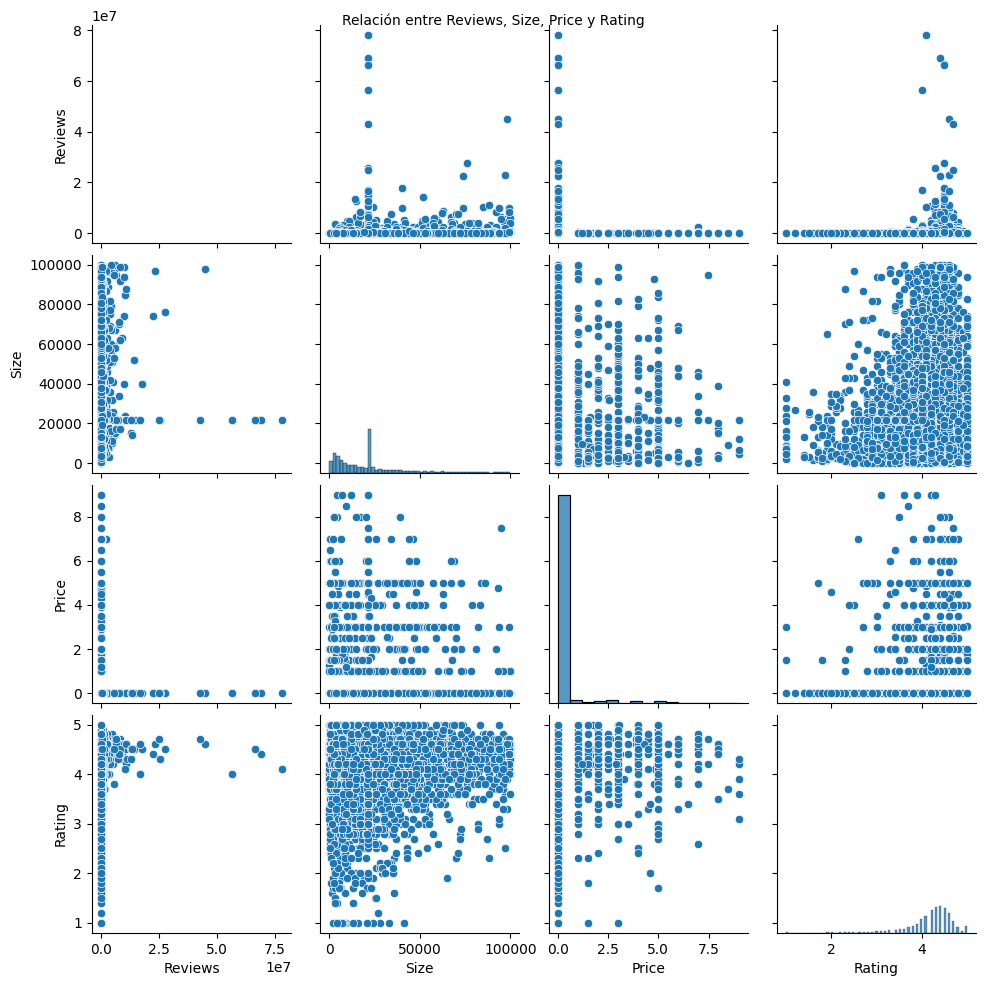

In [36]:
# filtrar los datos para que seaborn solo use las variables númericas que es desean
sns.pairplot(data[['Reviews', 'Size', 'Price','Rating']])
plt.suptitle('Relación entre Reviews, Size, Price y Rating', size=10)
plt.show()

Siguiendo con el análisis, sería de gran ayuda identificar la competencia que hay en la Google Store para cada categoría de las aplicaciones. Conocer la proporción de cada categoría nos podría indicar que sectores estan saturados de aplicativos. Qué crees?

**Pregunta 6:** Qué gráfico podriamos usar para visualizar esta proporción?

**Pregunta 7:** Dónde hay más competencia?, que porcentajes?

In [ ]:
# Genera aquí el código para gráficar la Proporción de las categorias de las
# aplicaciones en la Google Store

##### TAREA 11 #####################
# TU CÓDIGO AQUÍ


#############################

En este punto podemos continuar relacionando la variable categoría con las otras variables para seguir descubriendo elementos relevantes. Que tal si ahora, nos centramos en tratar de descrifrar como podemos medir la ganancia de reconocimiento rápidamente de las categorías? será que el número de instalaciones nos podría medir si esa categoría potencialmente puede ganar reconocimiento por la cantidad de instalaciones que tienen?

Por otro lado, vimos que aplicaciones gratuitas tienden a tener reviews más altos, para profundizar, podríamos revisar la relación que tiene el precio con las aplicaciones por categoría, nos daría esto indicios acerca de cual sector es más rentable o genera más ingresos?

**Pregunta 8:** Qué gráfico permite evidenciar cantidades en un conjunto de categorías?

**Pregunta 9:** Cuál es la categoría con un número mayor de instalaciones y por cual categoría en promedio se paga un precio más alto?

In [ ]:
# Genera aquí el código para gráficar la relación de cantidades con las categorías
# tanto de número total de instalaciones y precio promedio por categoría.

# en este punto para relacionar más fácilmente la información de las dos partes
# construir una figura en matplotlib con dos filas y una columna. En el lienzo 1
# grafica el número total de instalaciones por categoría y en el lienzo 2
# grafica el precio promedio por categoría

# hint: Para crear el gráfico de dos filas y una columna usen plt.subplots
# y luego envien cada lienzo como parámetro a la grafica de seaborn de esta manera:
# sns.graficoausar(....., ax=axes[0])

# Usen pandas para generar el conteo total de número de instalaciones y
# promedio por categorías usando la función groupby despues gráfica esta
# información con seaborn

##### TAREA 12 #####################
# TU CÓDIGO AQUÍ


#############################

En este punto deberíamos tener un poco más claro cual aplicación debería desarrollarse primero. Sin embargo, podemos analizar aspectos como desarrollo rápido del tipo de aplicación, ya que la empresa no cuenta con un amplio personal de desarrollo. Crees que el tamño del aplicativo "size" nos puede servir como criterio para decidir si una aplicación se puede desarrollar rápidamente, sin la necesidad de varios desarrolladores? Además, de manera similar podríamos pensar que la distribución de rating por categoría me puede brindar información de cuáles sectores tienen mayor exigencia en la calidad de las aplicaciones desarrolladas, Crees que la experiencia de algunos desarrolladores en el sector productivo nos da una ventaja en este sentido?


**Pregunta 10:** Qué gráficos son adecuados para visualizar estas distribuciones de manera detallada? Cómo podemos comparar las distribuciones?

**Pregunta 11:** Qué categoría tiene en promedio un tamaño de app mayor? cuál categoría presenta un sector más exigente?

**hint:** Solo compara las categorías de interés: "PRODUCTIVITY", "MEDICAL", "GAME"

In [ ]:
# Genera aquí el código para comparar las distribuciones del tamaño en las 3
# categorias de interés: 'PRODUCTIVITY', 'MEDICAL', 'GAME'

##### TAREA 13 #####################
# TU CÓDIGO AQUÍ


#############################

In [ ]:
# Genera aquí el código para comparar las distribuciones del rating en las 3
# categorias de interés: 'PRODUCTIVITY', 'MEDICAL', 'GAME'

##### TAREA 14 #####################
# TU CÓDIGO AQUÍ


#############################

## Fase 3: Conclusiones y sugerencias finales

Llegamos al final de nuestro análisis, como vimos se intentó relacionar la categoría a la que pertenecen las aplicaciones en el roadmap con variables que me pueden ayudar a cumplir las restricciones de la compañía, resumen:


1.   Cantidad de aplicaciones en la google store por categoría para cuantificar la competencia en cada sector.
2.   Cantidad de instalaciones de las app por categoría para abordar un posible crecimiento portencial o popularidad de las apps en cada categoría.
3. Precio promedio de pago por las apps en cada categoría para evaluar la rentabilidad en cada sector.
4. Tamaño de las apps por sector para evaluar la cantidad de recurso humano necesario para salir al mercado con una versión.
5. Rating por categoría como forma de evaluar la exigencia del sector y aprovechar la experiencia del equipo.

**Pregunta 12:** Cuál es el orden que van a proponer a los líderes de la empresa? qué sistema de calificación o criterios usaron para fijar ese orden?

